# Regression and Curve Fitting

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

from astropy.table import Table
import exoplanet as xo
import numpy as np
import pandas as pd
import pymc3 as pm
import pymc3_ext as pmx
import seaborn as sns
import theano.tensor as T

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


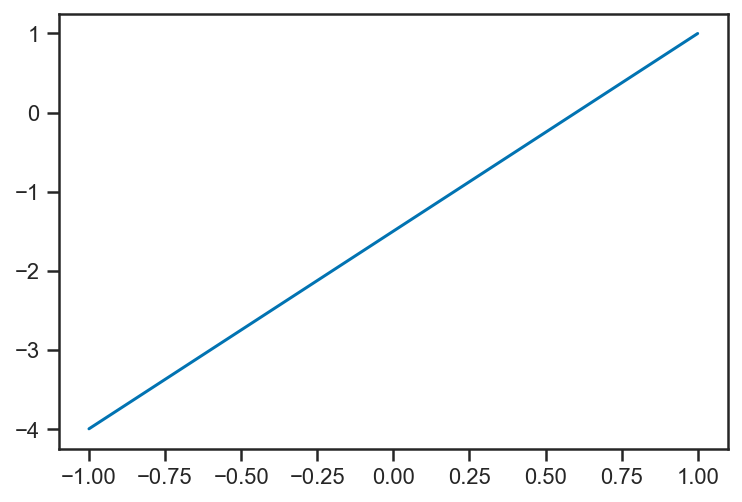

In [30]:
m_true = 2.5
b_true = -1.5

xs = linspace(-1, 1, 25)
ys_true = m_true*xs + b_true

plot(xs, ys_true)

<ErrorbarContainer object of 3 artists>

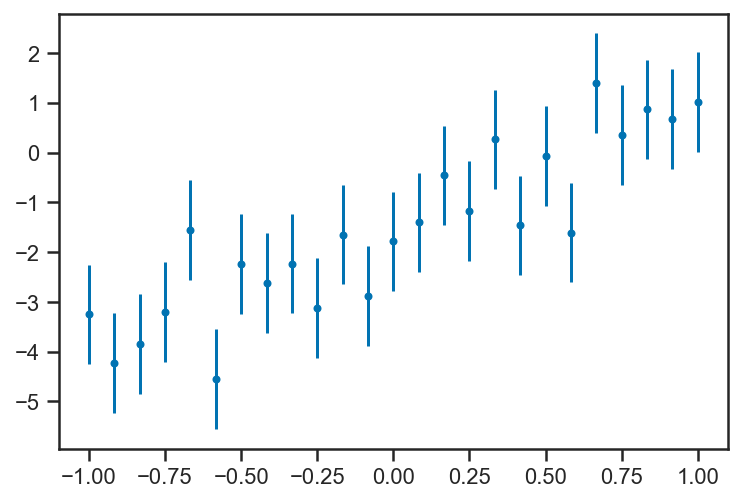

In [31]:
ys_obs = ys_true + randn(len(ys_true))
errorbar(xs, ys_obs, yerr=ones_like(ys_obs), fmt='.')

In [32]:
with pm.Model() as model:
    m = pm.Normal("m", 0, 4)
    b = pm.Normal("b", 0, 4)
    
    ys_true = pm.Deterministic("ys_true", m*xs + b)
    _ = pm.Normal("ys_obs", mu=ys_true, sigma=ones_like(ys_obs), observed=ys_obs)

In [33]:
with model:
    trace_linear = pm.sample()

/var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/ipykernel_6359/1043220295.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_linear = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 12 seconds.


/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'m'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'ys_true'}>,
        <AxesSubplot:title={'center':'ys_true'}>]], dtype=object)

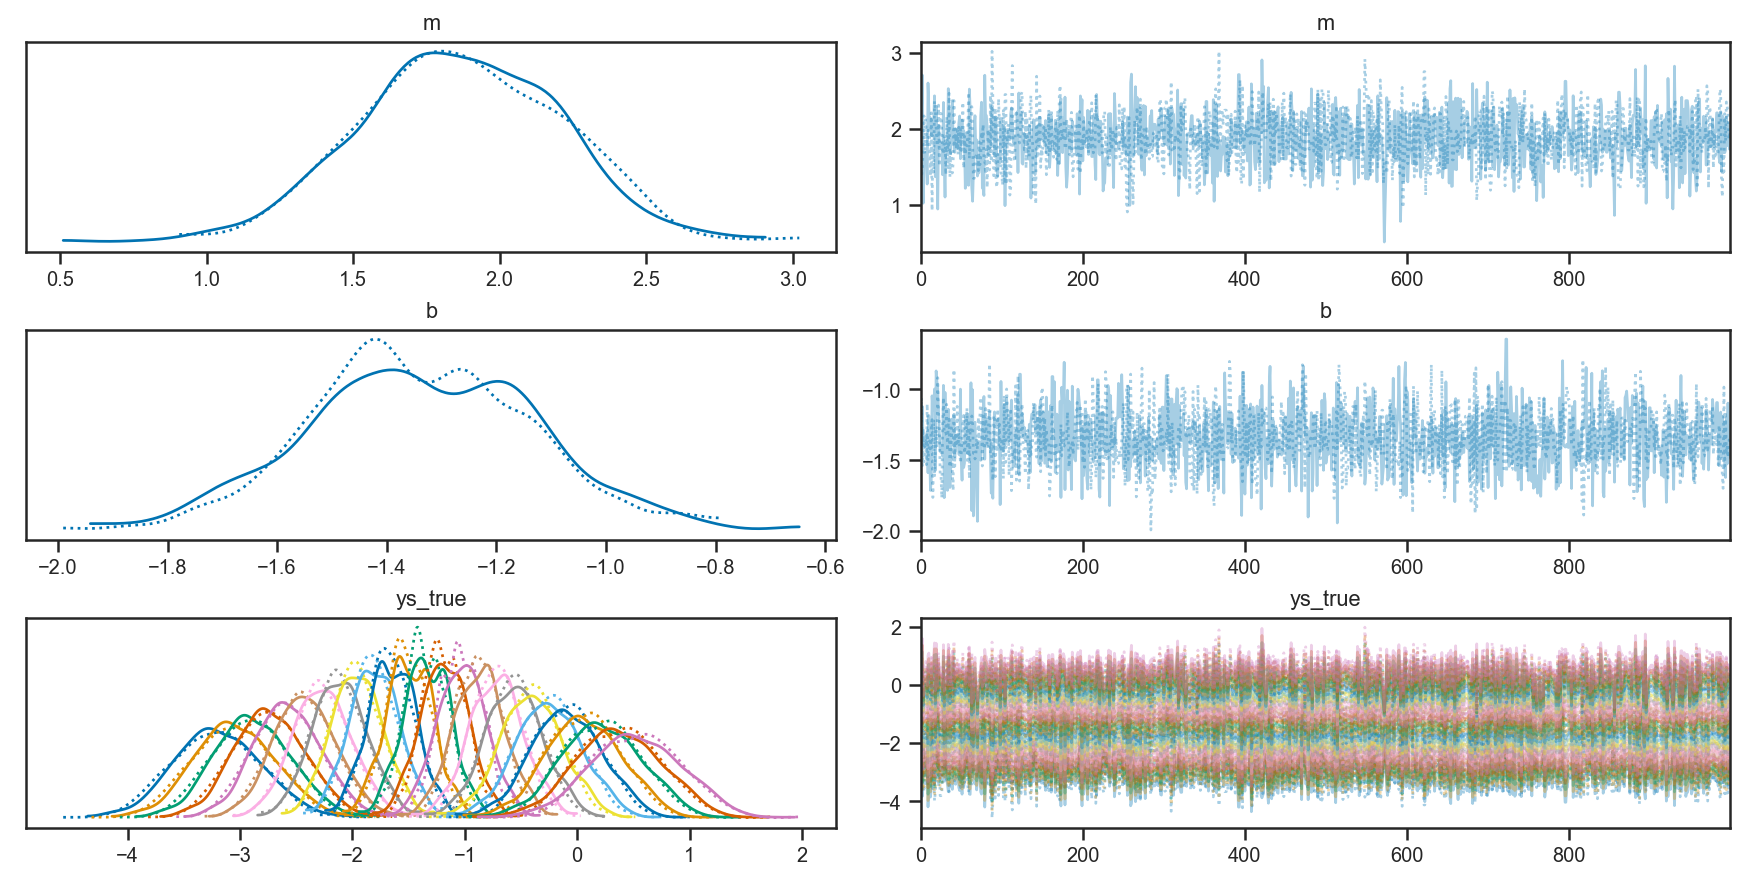

In [6]:
pm.plot_trace(trace_linear)

<ErrorbarContainer object of 3 artists>

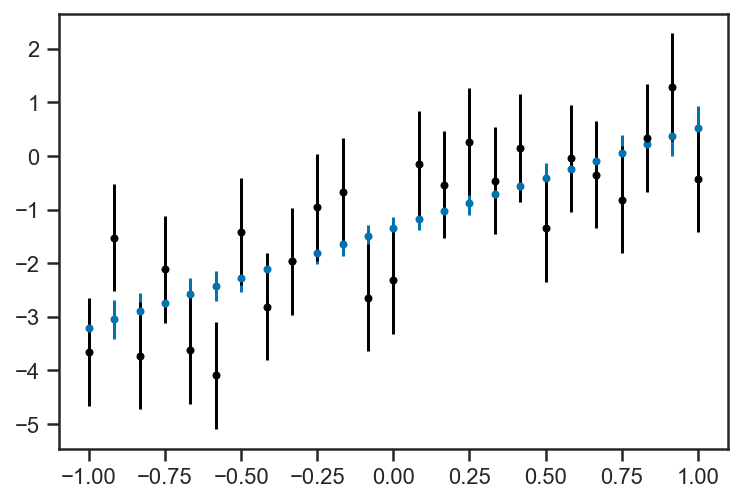

In [7]:
errorbar(xs, mean(trace_linear['ys_true'], axis=0), yerr=std(trace_linear['ys_true'], axis=0), fmt='.')
errorbar(xs, ys_obs, yerr=ones_like(ys_obs), color='black', fmt='.')

In [35]:
with pm.Model() as quadratic_model:
    c = pm.Normal("c", 0, 4)
    b = pm.Normal("b", 0, 4)
    a = pm.Normal("a", 0, 7)
    
    ys_true = pm.Deterministic("ys_true", c + xs*(b + a*xs))
    _ = pm.Normal("ys_obs", mu=ys_true, sigma=ones_like(ys_obs), observed=ys_obs)

In [36]:
with quadratic_model:
    quadratic_trace = pm.sample()

/var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/ipykernel_6359/2923709653.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  quadratic_trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, c]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
The acceptance probability does not match the target. It is 0.8884432826837806, but should be close to 0.8. Try to increase the number of tuning steps.


/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'ys_true'}>,
        <AxesSubplot:title={'center':'ys_true'}>]], dtype=object)

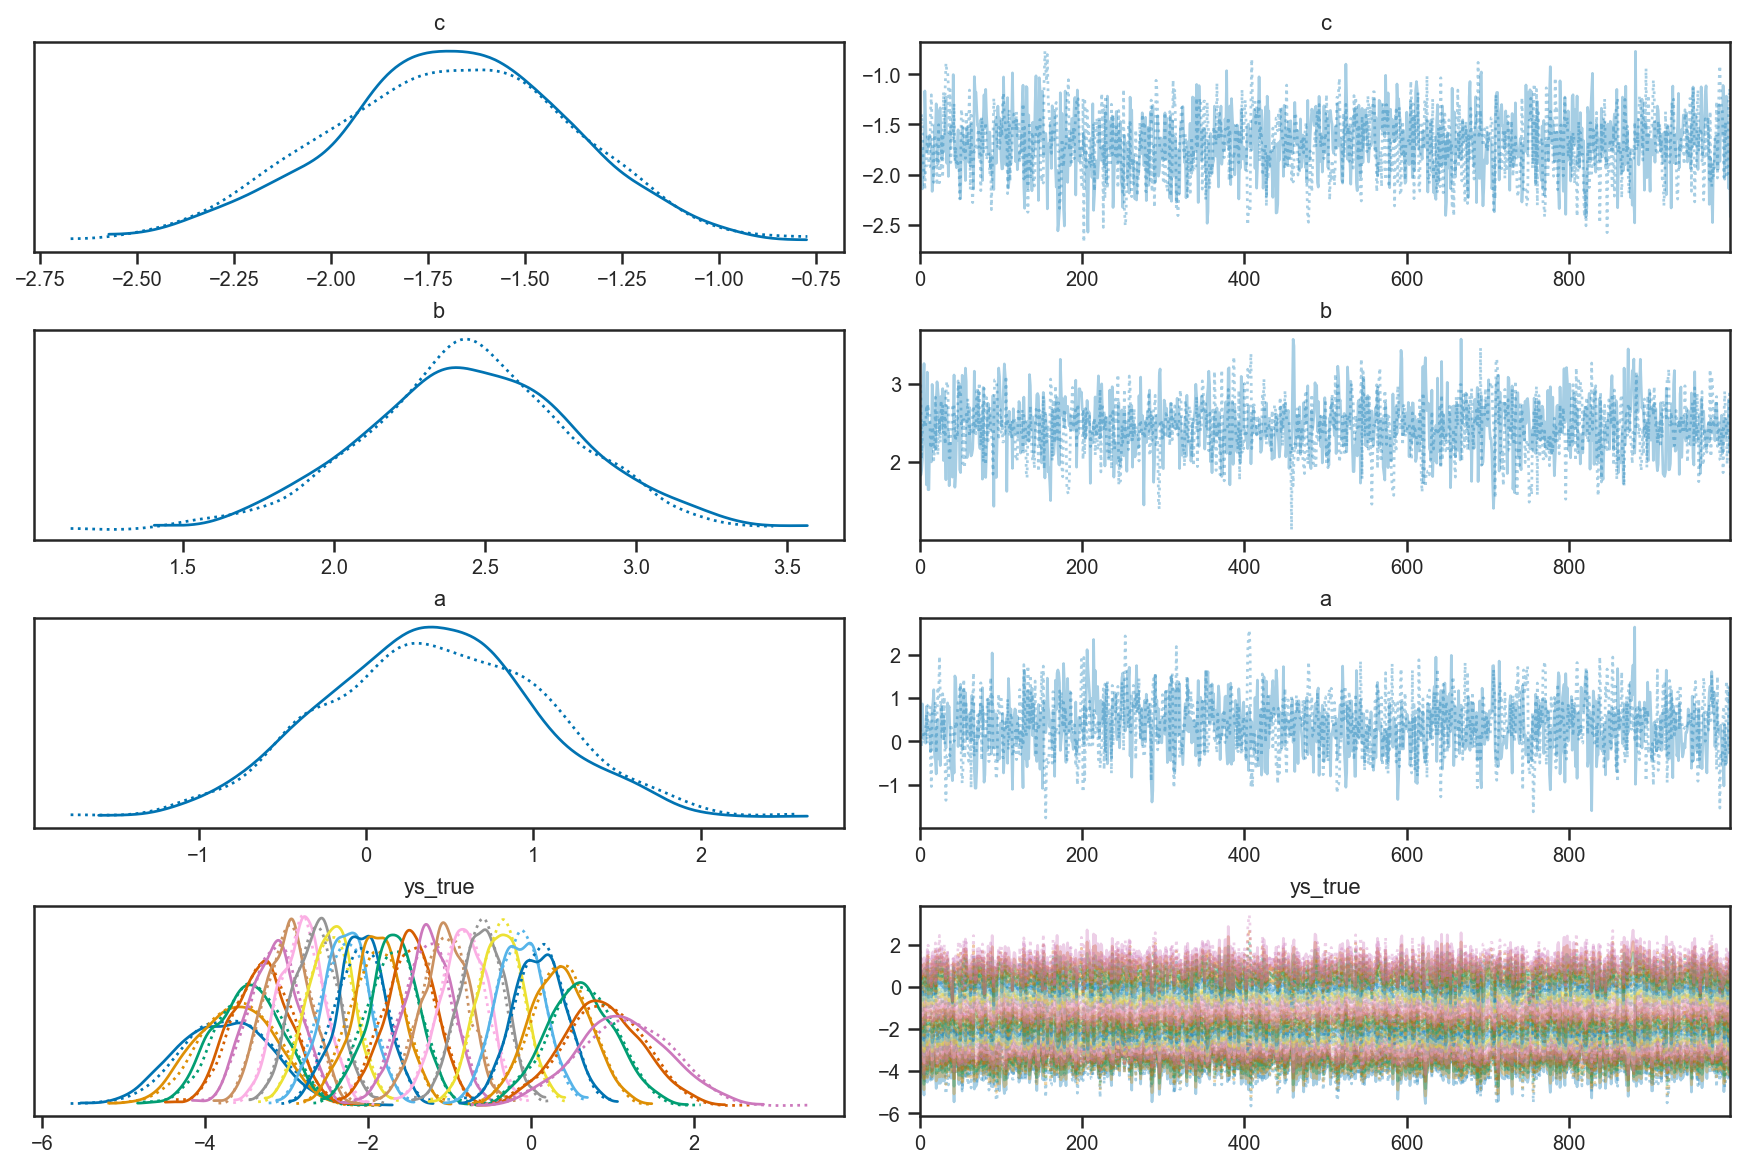

In [37]:
pm.plot_trace(quadratic_trace)

<ErrorbarContainer object of 3 artists>

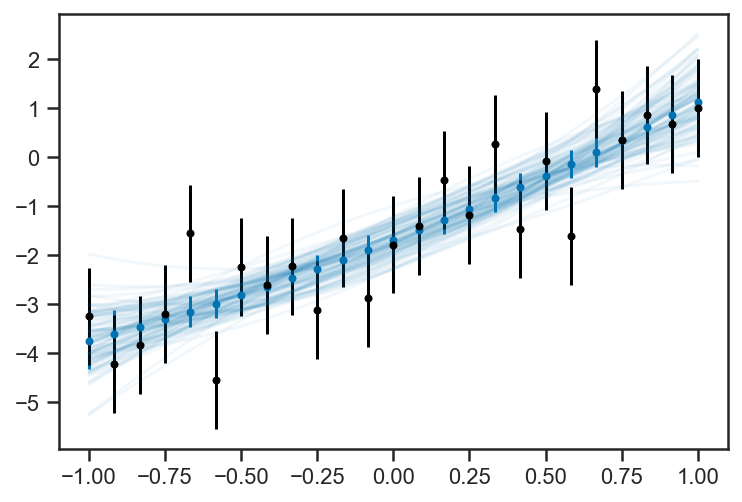

In [44]:
errorbar(xs, mean(quadratic_trace['ys_true'], axis=0), yerr=std(quadratic_trace['ys_true'], axis=0), fmt='.')
for i in range(100):
    plot(xs, quadratic_trace['ys_true'][randint(2000), :], color=sns.color_palette()[0], alpha=0.05)
errorbar(xs, ys_obs, yerr=ones_like(ys_obs), color='black', fmt='.')

In [45]:
with pm.Model() as intrinsic_error_model:
    m = pm.Normal("m", mu=0, sigma=4)
    b = pm.Normal("b", mu=0, sigma=4)
    
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # ys_true = pm.Normal("ys_true", mu=m*xs+b, sigma=sigma)    
    dy_unit = pm.Normal("dy_unit", mu=0, sigma=1, shape=ys_obs.shape)
    ys_true = pm.Deterministic("ys_true", m*xs+b+sigma*dy_unit)
    
    _ = pm.Normal("ys_obs", mu=ys_true, sigma=1, observed=ys_obs)

In [46]:
with intrinsic_error_model:
    trace_intrinsic = pm.sample()

/var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/ipykernel_6359/2730893626.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_intrinsic = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [dy_unit, sigma, b, m]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 13 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'m'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'dy_unit'}>,
        <AxesSubplot:title={'center':'dy_unit'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'ys_true'}>,
        <AxesSubplot:title={'center':'ys_true'}>]], dtype=object)

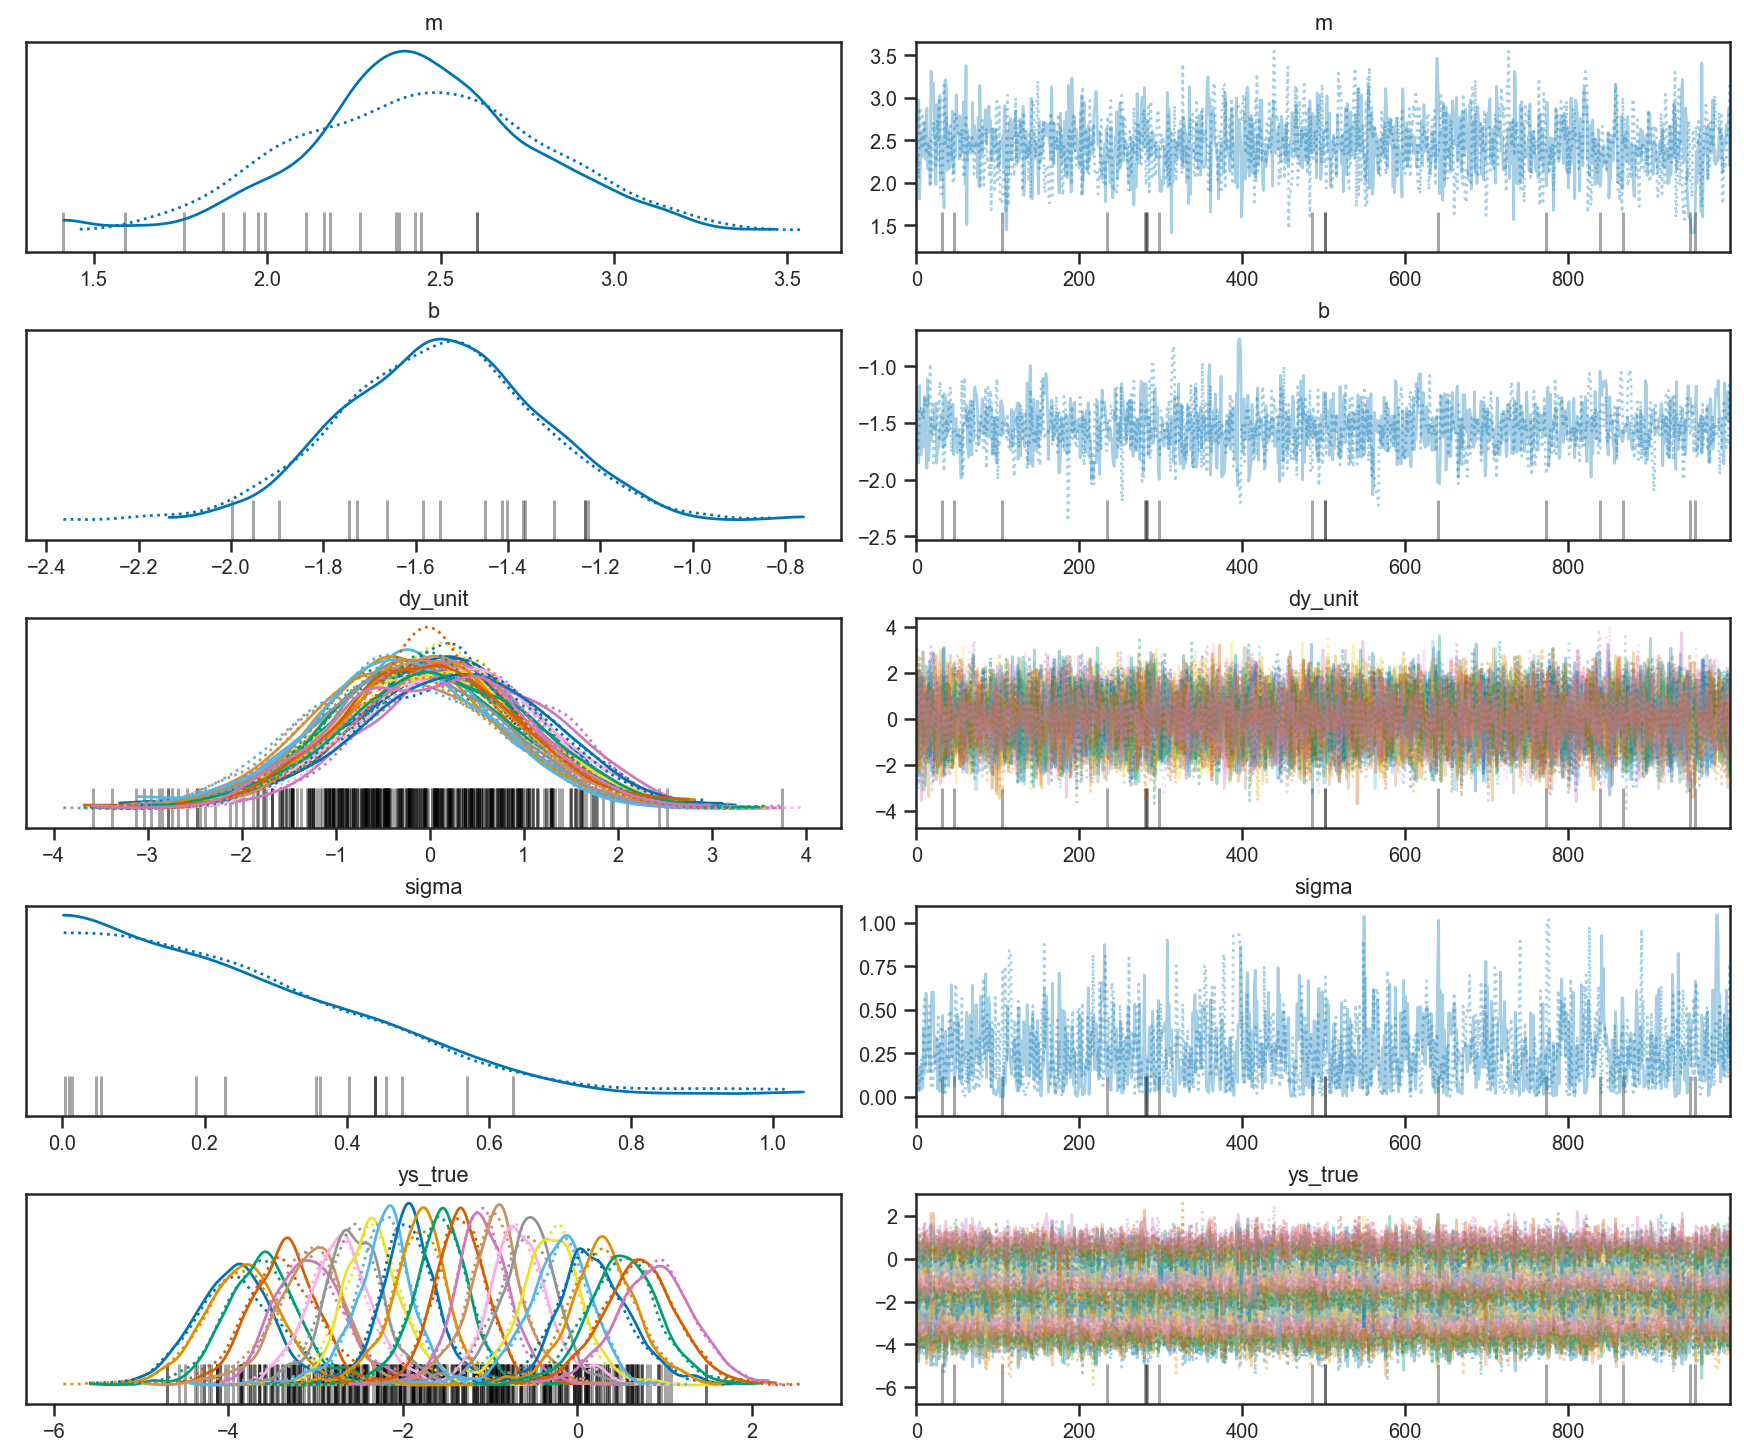

In [47]:
pm.plot_trace(trace_intrinsic)

<ErrorbarContainer object of 3 artists>

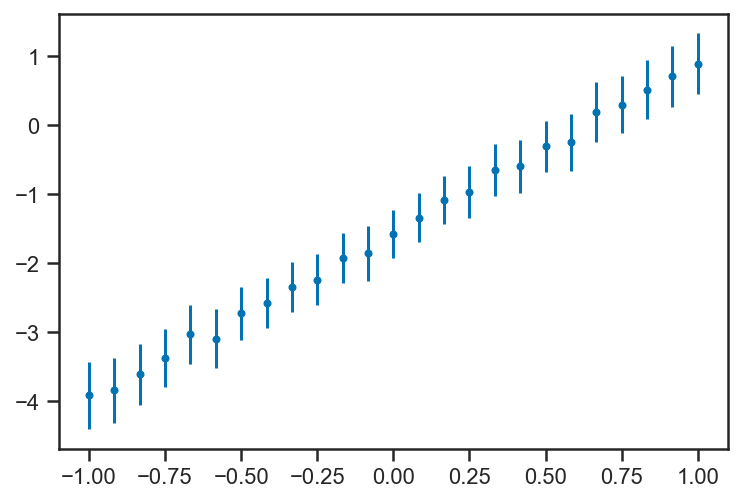

In [48]:
errorbar(xs, trace_intrinsic["ys_true"].mean(axis=0), yerr=trace_intrinsic["ys_true"].std(axis=0), fmt='.', label="Posterior")

<ErrorbarContainer object of 3 artists>

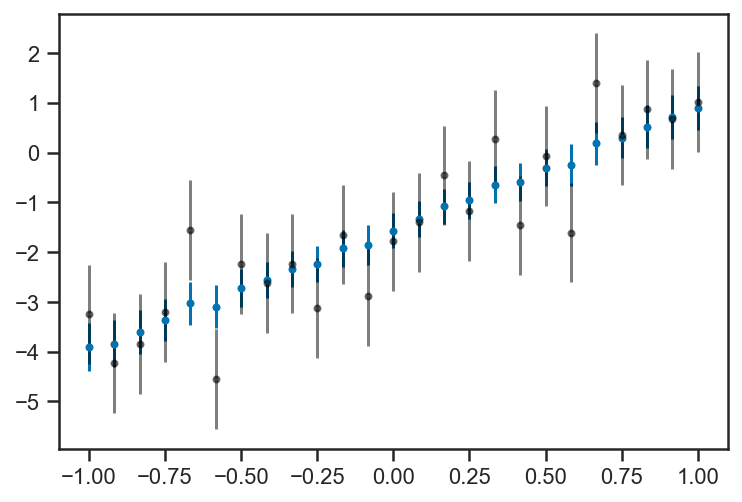

In [51]:
errorbar(xs, trace_intrinsic["ys_true"].mean(axis=0), yerr=trace_intrinsic["ys_true"].std(axis=0), fmt='.', label="Posterior")
errorbar(xs, ys_obs, yerr=ones_like(ys_obs), fmt='.', color="black", label="Observations", alpha=0.5)

51 Peg RV data, from [IPAC Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/overview/51%20Peg%20b#overview).  These data are reported in {cite:t}`Butler2006`.

In [2]:
fopeg_data = Table.read('data/ButlerEtAl200651PegUID_0113357_RVC_001.tbl.txt', format='ascii')
fopeg_data

<Table length=256>
      JD       Radial_Velocity Radial_Velocity_Uncertainty
     days           m / s                 m / s           
   float64         float64               float64          
-------------- --------------- ---------------------------
2450002.665695           -52.9                         4.1
 2450002.68434           -45.8                         4.8
 2450002.80022           -60.8                         4.6
2450002.815961           -53.3                         5.0
2450002.954711           -60.9                         5.5
2450002.968287           -57.3                         7.0
           ...             ...                         ...
 2452173.74912           -52.7                         5.8
2452173.779745           -44.8                         5.9
2452184.745995            15.4                         5.5
2452184.776157             3.9                         5.5
2452189.678866           -37.8                         5.9
2452189.707882           -46.2                         6.0

This is the period reported by {cite:t}`Butler2006`:

In [3]:
P_fop = 4.230785 # (36) uncertainty in the last two digits!
sigma_P_fop = 0.000036

tmid = median(fopeg_data['JD'])

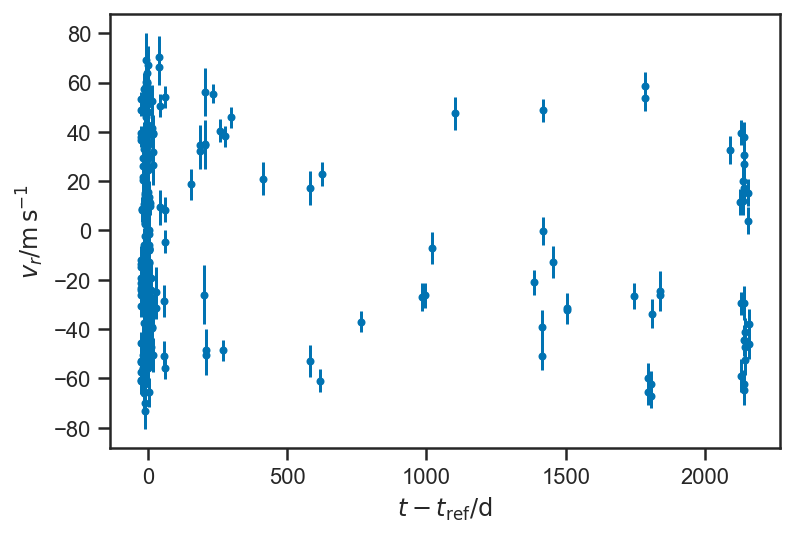

In [4]:
def plot_data(P=None, **kwargs):
    if P is None:
        ts = fopeg_data['JD'] - tmid
        xlabel(r'$t - t_\mathrm{ref} / \mathrm{d}$')
    else:
        ts = (fopeg_data['JD'] - tmid) % P
        xlabel(r'$ \left( t - t_\mathrm{ref} \right) \, \mathrm{mod} \, P / \mathrm{d}$')
        
    errorbar(ts, fopeg_data['Radial_Velocity'], yerr=fopeg_data['Radial_Velocity_Uncertainty'], fmt='.', **kwargs)
    ylabel(r'$v_r / \mathrm{m} \, \mathrm{s}^{-1}$')
    
plot_data()

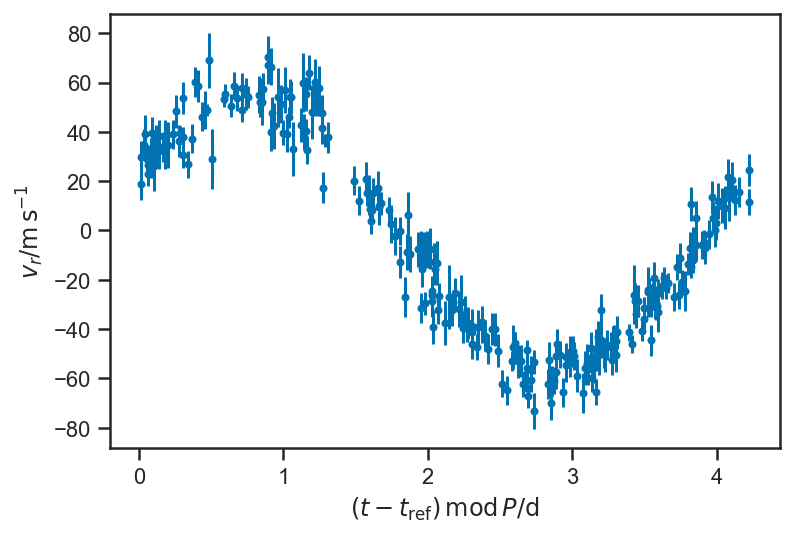

In [5]:
plot_data(P = P_fop)

Note Kepler's equations (e.g. {cite:t}`Fulton2018`):
$$
\frac{2 \pi \left( t - t_0 \right)}{P} = M = E - e \sin E
$$
with
$$
\nu = 2 \tan^{-1} \left( \sqrt{\frac{1+e}{1-e}} \tan \frac{E}{2} \right)
$$
and
$$
\dot{z} = v_r = K \left( \cos \left( \nu + \omega \right) + e \cos \omega \right),
$$
where 
* $t_0$ is the time of pericentre passage of the system.
* $P$ is the period.
* $e$ is the eccentricity.
* $E$ is the "eccentric anomaly".
* $\nu$ is the "true anomaly".
* $\omega$ is the argument of pericentre (of the star).
* $K$ is the semi-amplitude of the radial velocity (related to the planet and star masses and the inclination).

This formula relates something we measure "perfectly"---$t$, the time we measure the velocity---to something we measure with uncertainty, the radial velocity.  This is regression.

In [6]:
with pm.Model() as basic_rv:
    K = pm.Lognormal("K", mu=log(55.0), sigma=0.1)
    
    dP = pm.Normal("dP", mu=0, sigma=10)
    P = pm.Deterministic("P", P_fop + sigma_P_fop*dP)
    
    # Eccentricity vector:
    A = pmx.UnitDisk("A", testval=[0.01, 0.01])
    e = pm.Deterministic("e", T.sqrt(A[0]*A[0] + A[1]*A[1]))
    omega = pm.Deterministic("omega", T.arctan2(A[1], A[0]))
    
    t0_frac = pm.Uniform("t0_frac", 0, 1, testval=0.5)
    t0 = pm.Deterministic("t0", tmid + P*t0_frac)
    
    orbit = xo.orbits.KeplerianOrbit(period=P, t0=t0, ecc=e, omega=omega)
    
    rv = pm.Deterministic("v_r", orbit.get_radial_velocity(fopeg_data['JD'], K=K))
    
    _ = pm.Normal("v_r_obs", mu=rv, sigma=fopeg_data['Radial_Velocity_Uncertainty'], observed=fopeg_data['Radial_Velocity'])

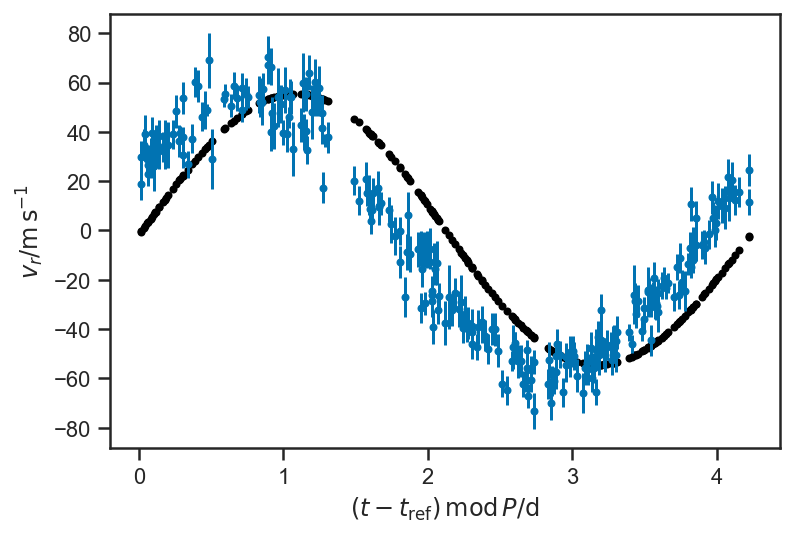

In [7]:
def plot_rv_curve(rvs, P=None, **kwargs):
    if P is None:
        ts = fopeg_data['JD'] - tmid
        xlabel(r'$t - t_\mathrm{ref} / \mathrm{d}$')
    else:
        ts = (fopeg_data['JD'] - tmid) % P
        xlabel(r'$ \left( t - t_\mathrm{ref} \right) \, \mathrm{mod} \, P / \mathrm{d}$')

    marker = kwargs.pop('marker', '.')
    scatter(ts, rvs, marker=marker, **kwargs)
plot_data(P=P_fop)
plot_rv_curve(pmx.eval_in_model(rv, basic_rv.test_point, model=basic_rv), P=P_fop, color='black')

In [9]:
with basic_rv:
    map_soln = pmx.optimize(start=basic_rv.test_point, vars=[t0_frac])
    map_soln = pmx.optimize(start=map_soln, vars=[t0_frac, dP])
    map_soln = pmx.optimize(start=map_soln, vars=[t0_frac, dP, K, A])

optimizing logp for variables: [t0_frac]


message: Optimization terminated successfully.
logp: -2244.1075127125005 -> -895.194386147021
optimizing logp for variables: [dP, t0_frac]


message: Desired error not necessarily achieved due to precision loss.
logp: -895.194386147021 -> -892.0967029641428
optimizing logp for variables: [A, K, dP, t0_frac]


message: Optimization terminated successfully.
logp: -892.0967029641428 -> -889.7860524910117


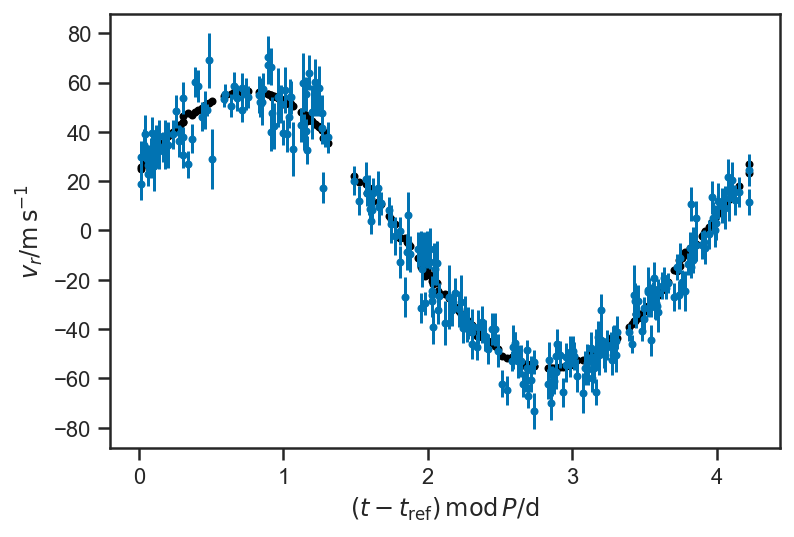

In [10]:
plot_data(P=P_fop)
plot_rv_curve(pmx.eval_in_model(rv, map_soln, model=basic_rv), P=P_fop, color='black')

In [21]:
with basic_rv:
    basic_rv_trace = pm.sample(tune=1000, draws=1000)

/var/folders/35/vcq24mtj2_g5wk96mbck0cw400018s/T/ipykernel_6359/3110477701.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  basic_rv_trace = pm.sample(tune=1000, draws=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [t0_frac, A, dP, K]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'dP'}>,
        <AxesSubplot:title={'center':'dP'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'P'}>],
       [<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'A'}>],
       [<AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'e'}>],
       [<AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'omega'}>],
       [<AxesSubplot:title={'center':'t0_frac'}>,
        <AxesSubplot:title={'center':'t0_frac'}>],
       [<AxesSubplot:title={'center':'t0'}>,
        <AxesSubplot:title={'center':'t0'}>],
       [<AxesSubplot:title={'center':'v_r'}>,
        <AxesSubplot:title={'center':'v_r'}>]], dtype=object)

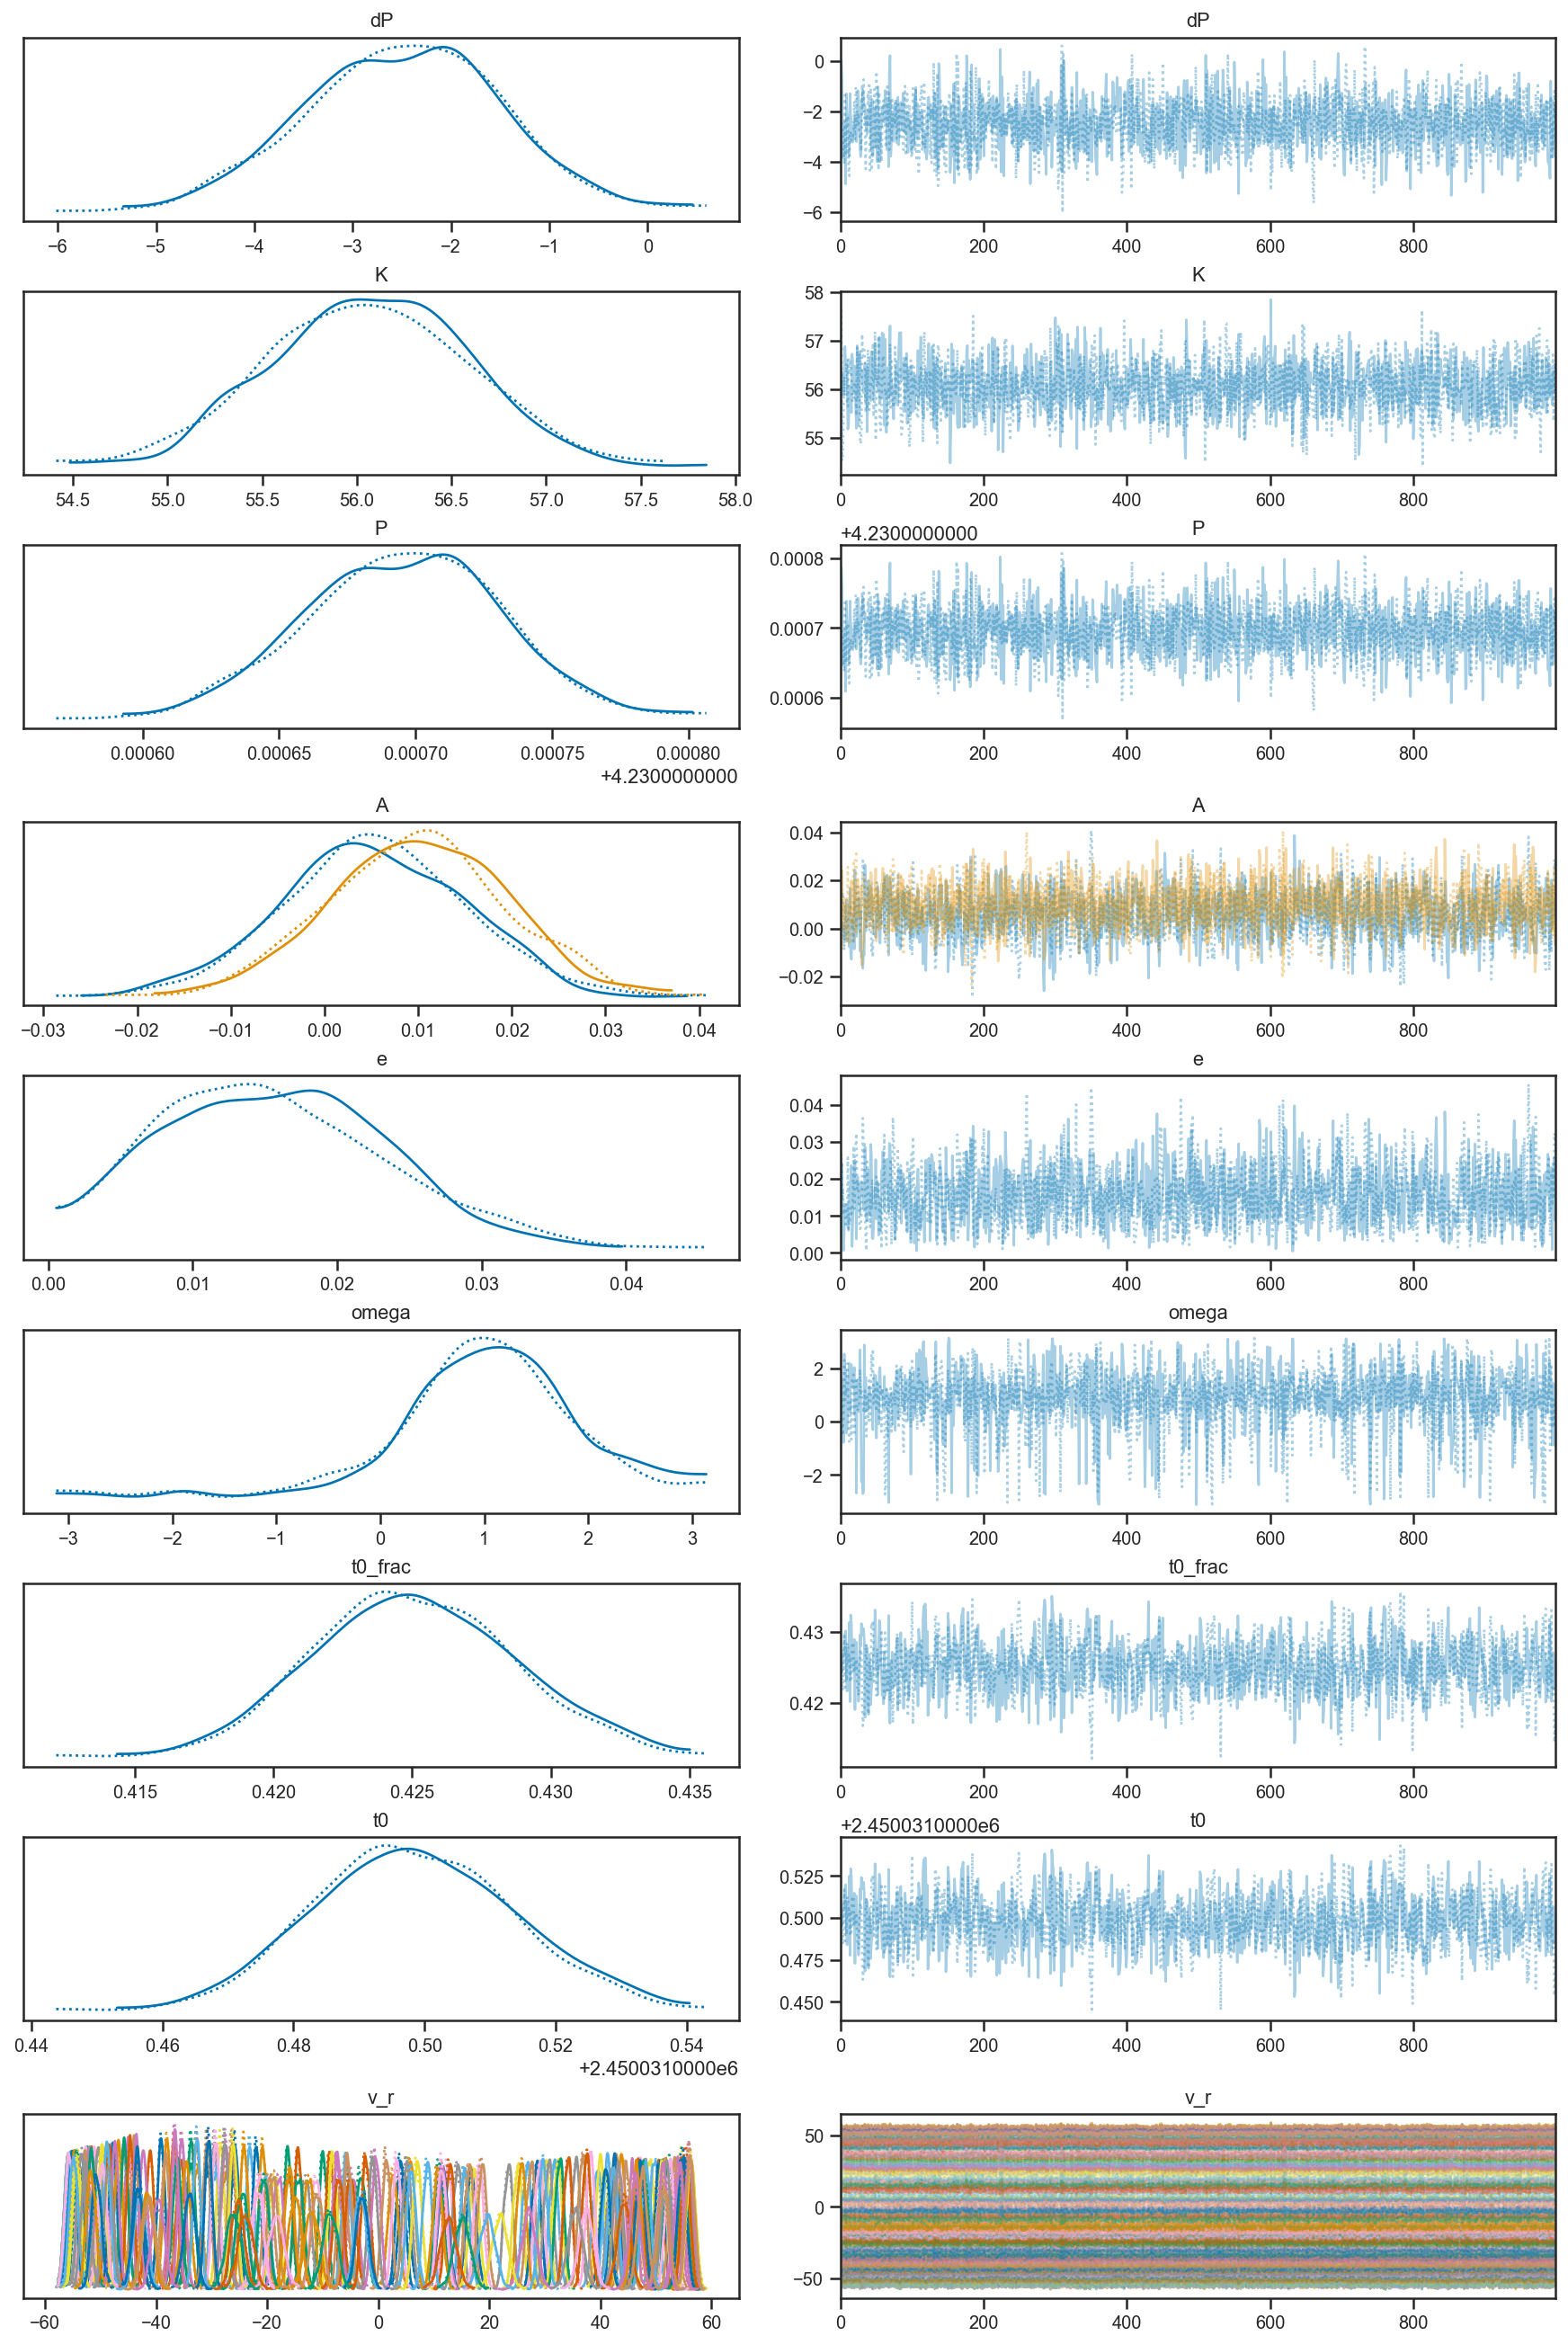

In [22]:
pm.plot_trace(basic_rv_trace)

/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:ylabel='P'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='e'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='omega'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='K', ylabel='t0'>, <AxesSubplot:xlabel='P'>,
        <AxesSubplot:xlabel='e'>, <AxesSubplot:xlabel='omega'>]],
      dtype=object)

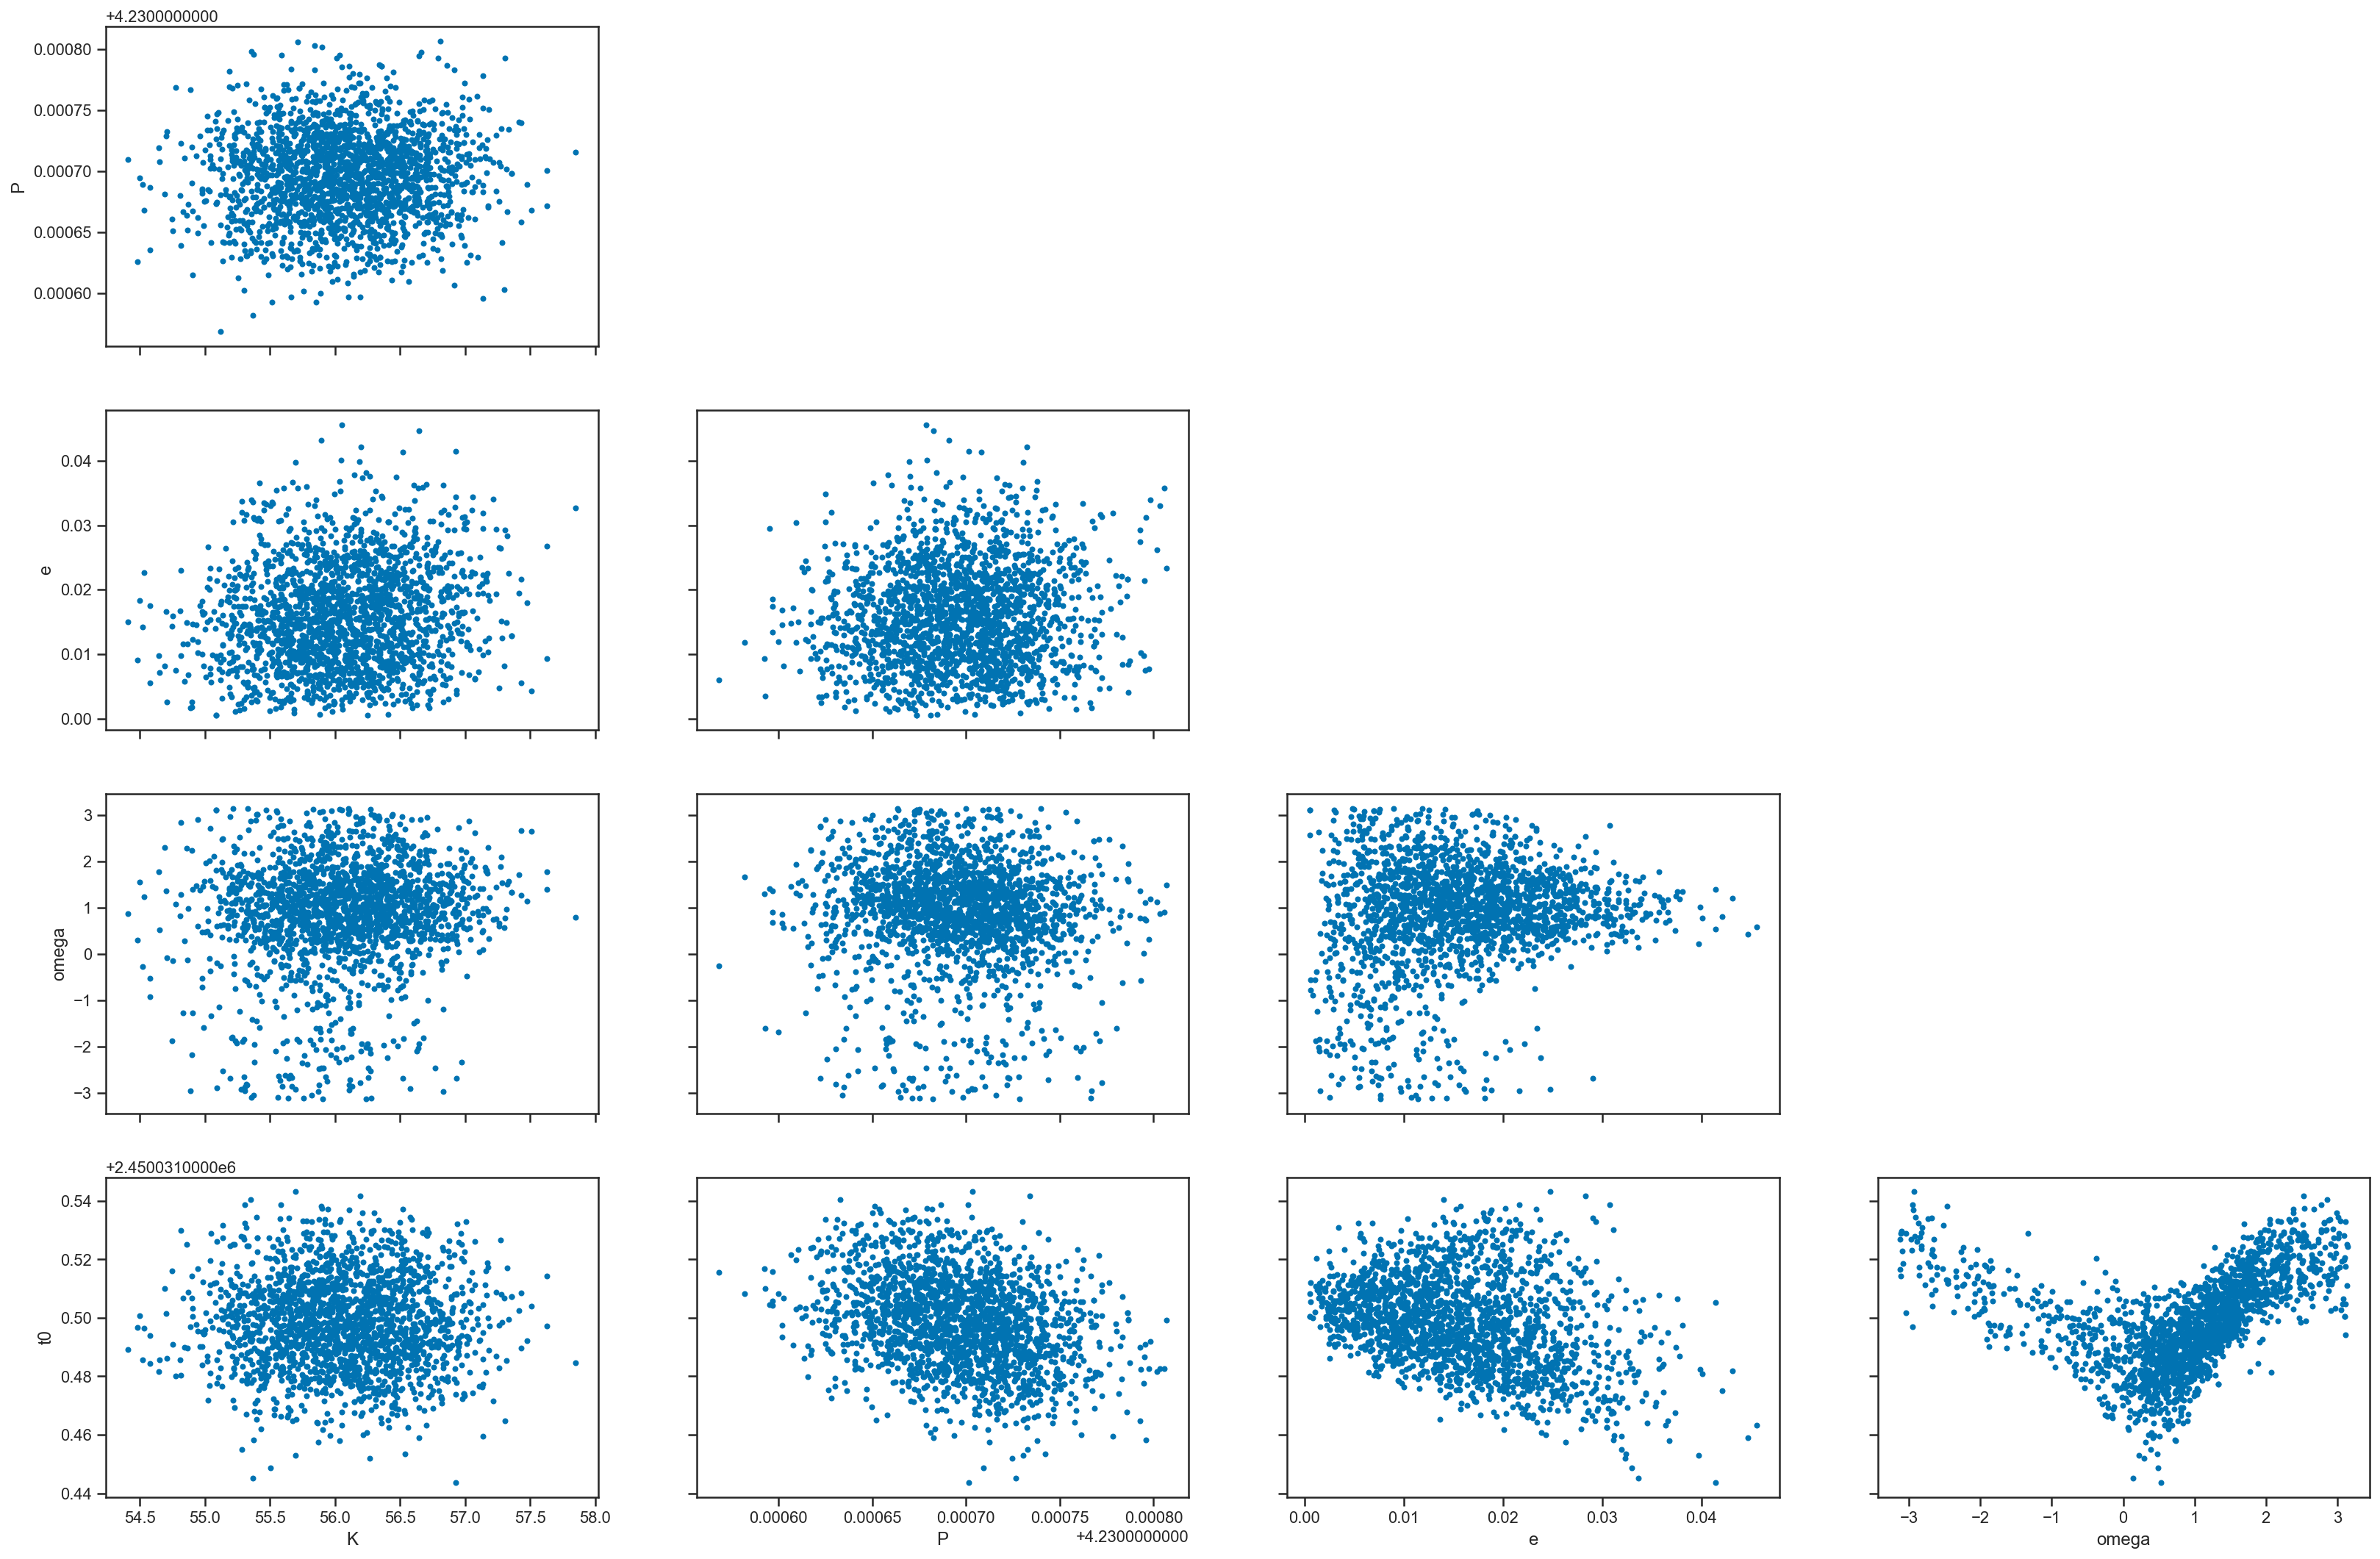

In [23]:
pm.plot_pair(basic_rv_trace, var_names=['K', 'P', 'e', 'omega', 't0'])

/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'P'}>]], dtype=object)

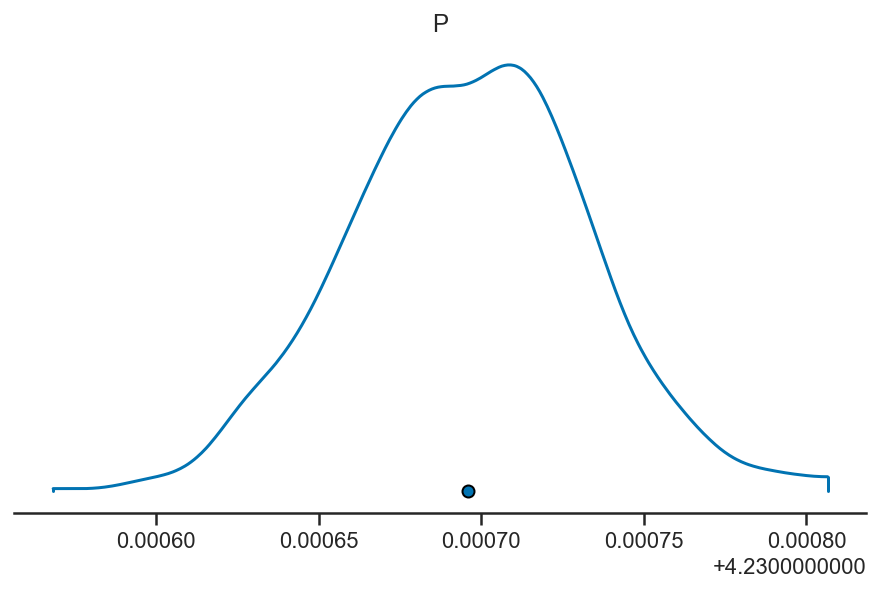

In [24]:
pm.plot_density(basic_rv_trace, var_names=['P'], hdi_prob=1)

/Users/wfarr/miniconda3/envs/Astrostatistics688/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'e'}>]], dtype=object)

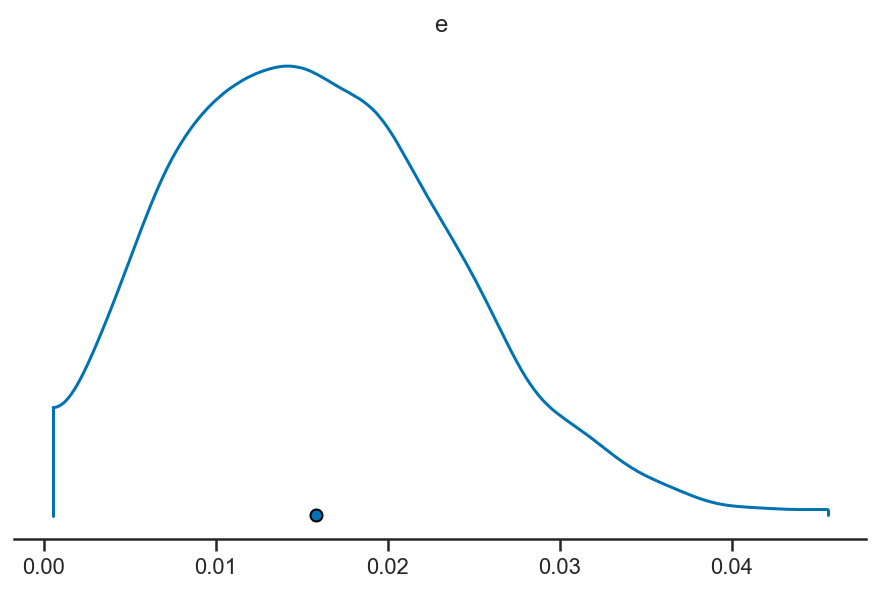

In [25]:
pm.plot_density(basic_rv_trace, var_names=['e'], hdi_prob=1)

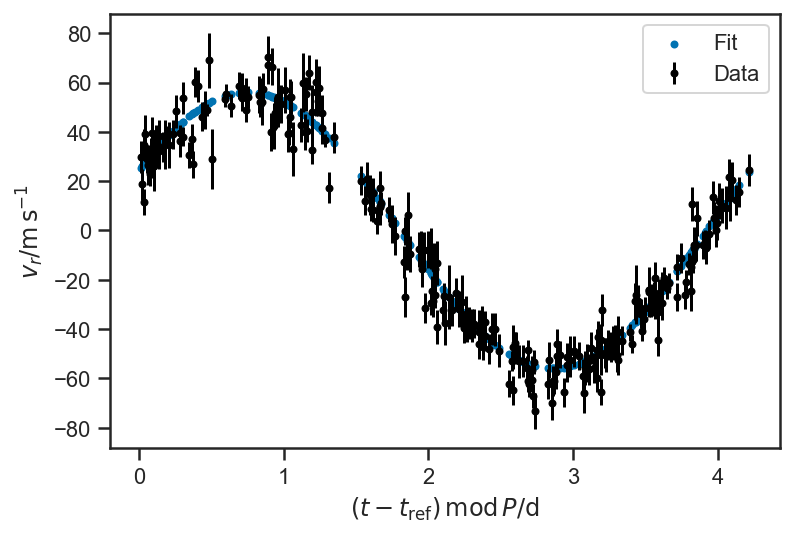

In [26]:
N = basic_rv_trace['P'].shape[0]
i = randint(0, N)
P = basic_rv_trace['P'][i]
plot_data(P = P, color='black', label='Data')
plot_rv_curve(basic_rv_trace['v_r'][i,:], P = P, label='Fit')
legend(loc='best')

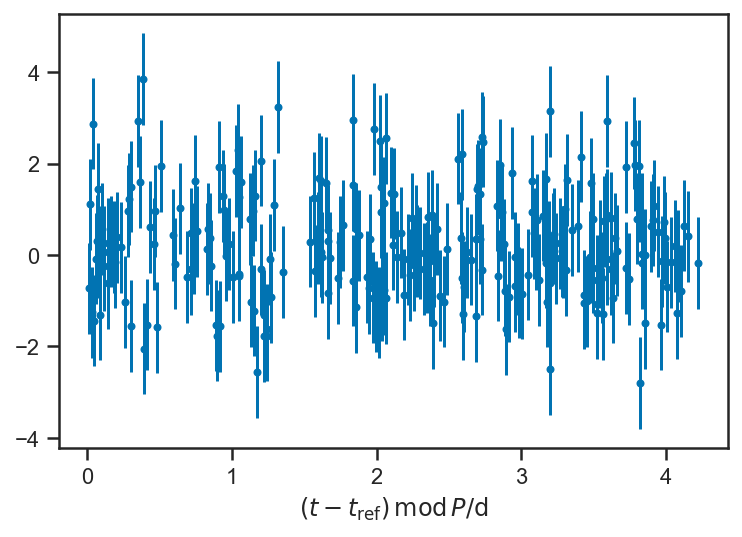

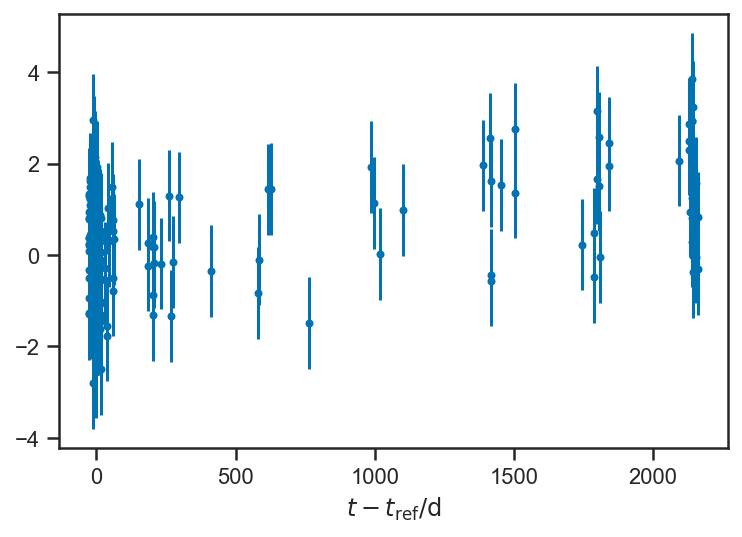

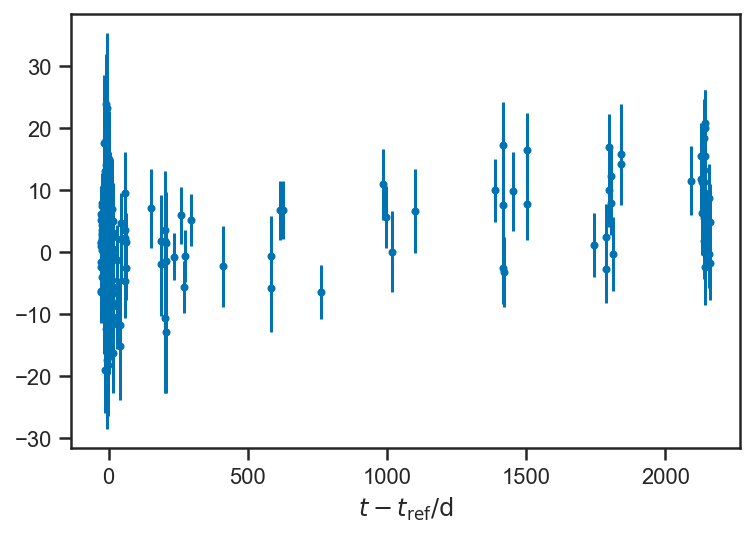

In [27]:
def plot_residuals(rvs, P=None, normalize=True, **kwargs):
    if P is None:
        ts = fopeg_data['JD'] - tmid
        xlabel(r'$t - t_\mathrm{ref} / \mathrm{d}$')
    else:
        ts = (fopeg_data['JD'] - tmid) % P
        xlabel(r'$ \left( t - t_\mathrm{ref} \right) \, \mathrm{mod} \, P / \mathrm{d}$')

    r = rvs - fopeg_data['Radial_Velocity']
    if normalize:
        r = r / fopeg_data['Radial_Velocity_Uncertainty']
        sigma_r = ones_like(r)
    else:
        sigma_r = fopeg_data['Radial_Velocity_Uncertainty']
        
    fmt = kwargs.pop('fmt', '.')
    errorbar(ts, r, yerr=sigma_r, fmt=fmt, **kwargs)
plot_residuals(mean(basic_rv_trace['v_r'], axis=0), P = mean(basic_rv_trace['P']))
figure()
plot_residuals(mean(basic_rv_trace['v_r'], axis=0))
figure()
plot_residuals(mean(basic_rv_trace['v_r'], axis=0), normalize=False)

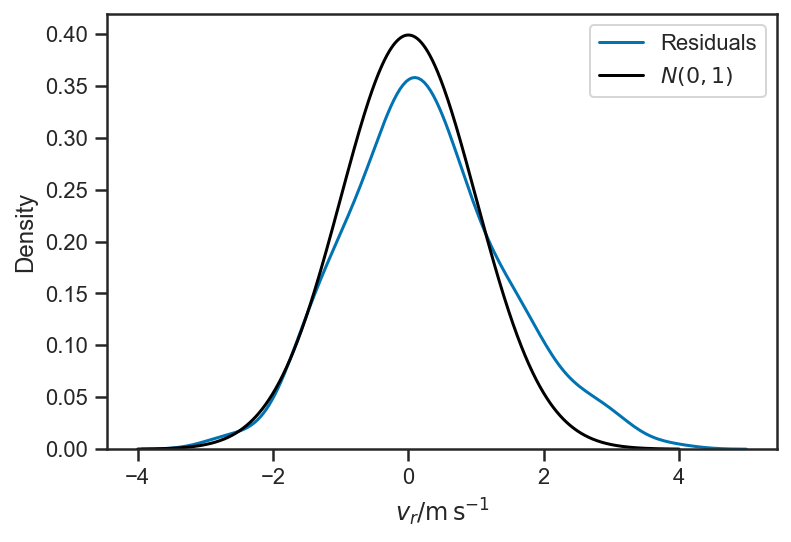

In [28]:
sns.kdeplot((mean(basic_rv_trace['v_r'], axis=0) - fopeg_data['Radial_Velocity'])/fopeg_data['Radial_Velocity_Uncertainty'], label='Residuals')
xlabel(r'$v_r / \mathrm{m} \, \mathrm{s}^{-1}$')
xs = linspace(-4, 4, 1024)
plot(xs, 1/sqrt(2*pi)*exp(-0.5*xs*xs), color='black', label='$N(0,1)$')
legend(loc='best')